In [334]:
# Import signal_detection from image_processing.py
# and use it to detect signals in a given image
import sys
import os
import cv2
import numpy as np
import importlib
import image_processing as ip  # Assuming image_processing.py is in the same directory
import matplotlib.pyplot as plt

importlib.reload(ip)


<module 'image_processing' from 'e:\\Projects\\traffic-saviour\\server\\image_processing.py'>

In [335]:
# Choose a random image from dataset folder and run signal_detection on it,
# then plot the image with the detected signals
def main(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Could not read image from {image_path}")
        sys.exit(1)
    
    # Detect signals in the image
    signals = ip.signal_detection(image_path)
    
    # Plot the original image and the detected signals
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected: {signals}")
    
    # plt.subplot(1, 2, 2)
    # plt.imshow(cv2.cvtColor(signals, cv2.COLOR_BGR2RGB))
    # plt.title("Detected Signals")
    
    plt.show()

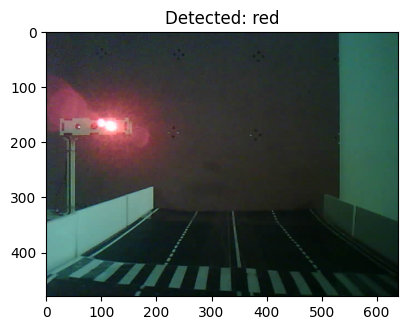

In [336]:
# Select random image from dataset folder and run main function
if __name__ == "__main__":
    # Specify the path to the dataset folder
    dataset_folder = "../dataset"
    
    # Get a list of all image files in the dataset folder
    image_files = [f for f in os.listdir(dataset_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Check if there are any images in the dataset folder
    if not image_files:
        print("No images found in the dataset folder.")
        sys.exit(1)
    
    # Choose a random image file
    random_image_file = np.random.choice(image_files)
    random_image_path = os.path.join(dataset_folder, random_image_file)
    
    # Run the main function with the selected image
    main(random_image_path)

In [337]:
# Function to process and plot the images
def main_zebra(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Could not read image from {image_path}")
        sys.exit(1)
    
    # Detect zebras in the image
    zebra_detected, contours, filtered_contours = ip.zebra_detection(image_path)
    print(f"Total contours detected: {len(contours)}")
    print(f"Filtered contours detected: {len(filtered_contours)}")
    
    # Create copies of the original image for drawing contours
    image_with_all_contours = image.copy()
    image_with_filtered_contours = image.copy()
    
    # Draw all detected contours on the image
    cv2.drawContours(image_with_all_contours, contours, -1, (0, 255, 0), 2)  # Green for all contours
    
    # Draw filtered contours on the image
    cv2.drawContours(image_with_filtered_contours, filtered_contours, -1, (0, 0, 255), 2)  # Red for filtered contours
    
    # Plot the original image, image with all contours, and image with filtered contours
    plt.figure(figsize=(15, 10))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    
    # Image with all contours
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(image_with_all_contours, cv2.COLOR_BGR2RGB))
    plt.title(f"All Contours: {len(contours)}")
    plt.axis('off')
    
    # Image with filtered contours
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(image_with_filtered_contours, cv2.COLOR_BGR2RGB))
    plt.title(f"Filtered Contours: {len(filtered_contours)} Zebra Detected: {zebra_detected}")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

Total contours detected: 11
Filtered contours detected: 8


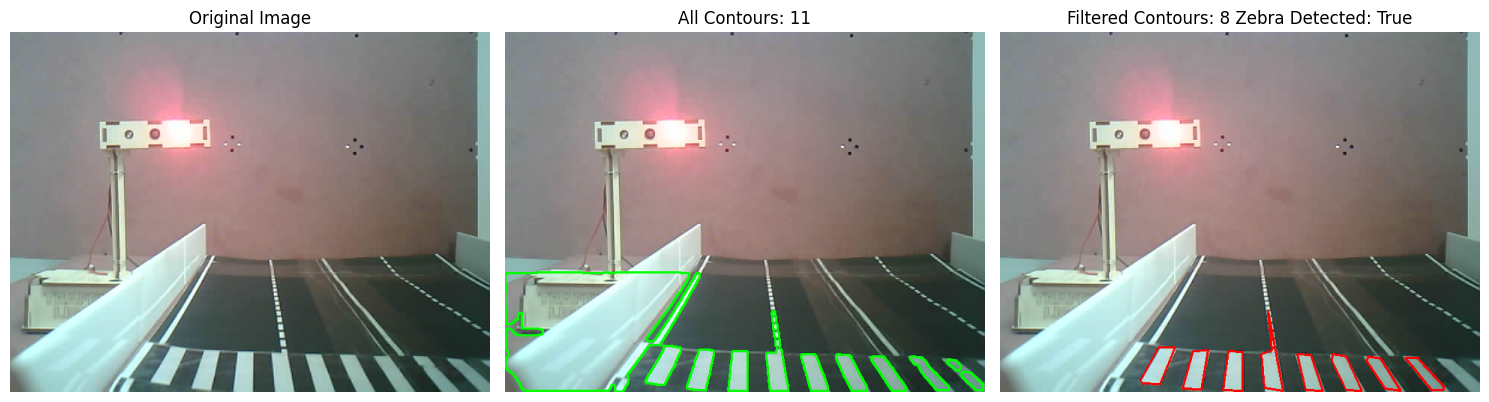

In [353]:
# Select random image from dataset folder and run main_zebra function
if __name__ == "__main__":
    # Specify the path to the dataset folder
    dataset_folder = "../dataset"
    
    # Get a list of all image files in the dataset folder
    image_files = [f for f in os.listdir(dataset_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Check if there are any images in the dataset folder
    if not image_files:
        print("No images found in the dataset folder.")
        sys.exit(1)
    
    # Choose a random image file
    random_image_file = np.random.choice(image_files)
    random_image_path = os.path.join(dataset_folder, random_image_file)
    
    # Run the main function with the selected image
    main_zebra(random_image_path)

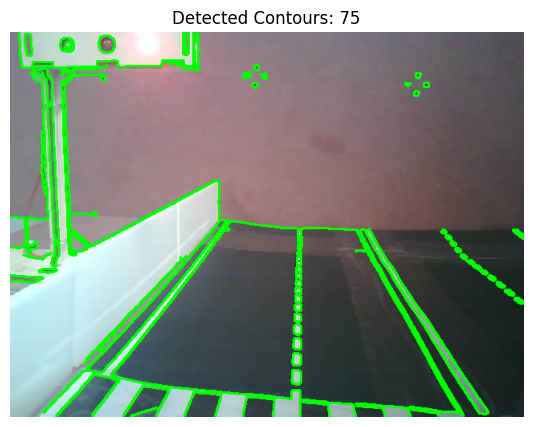

In [339]:
# Read random image from dataset and run contour detection and plot them
# on the image with contours

dataset_folder = "../dataset"
image_files = [f for f in os.listdir(dataset_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
if not image_files:
    print("No images found in the dataset folder.")
    sys.exit(1)

random_image_file = np.random.choice(image_files)
random_image_path = os.path.join(dataset_folder, random_image_file)
image = cv2.imread(random_image_path)
if image is None:
    print(f"Error: Could not read image from {random_image_path}")
    sys.exit(1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist_eq = cv2.equalizeHist(gray)
blurred = cv2.GaussianBlur(hist_eq, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
# Find contours in the image
contours = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Contours: {len(contours)}")
plt.axis('off')
plt.show()
